# Audio Processing Basics

## Audio Formats

.wav
- uncompressed. standard cd format.
- easy to work with in python

.mp3
- lossy compression. can lose information

.flac
- lossless. can reconstruct original without losing info.

## Signal Parameters

- number of channels (how)
    - can give impression that sound is coming from multiple directions 
- sample width 
    - number of bytes per sample
- framerate/sample rate
    - important
    - number of samples per second
    - 44100 Hz is standard
- number of frames
- values of a frame

## Wave Module

In [1]:
import wave ##pip install pyaudio

# open wave file
obj = wave.open("output.wav",'rb')

print("Number of channels", obj.getnchannels())
print("Sample width", obj.getsampwidth())
print("Frame rate.", obj.getframerate())
print("Number of frames", obj.getnframes())
print("parameters:", obj.getparams())
frames = obj.readframes(obj.getnframes())

print(len(frames) / obj.getsampwidth(), frames[0], type(frames[0]))
obj.close()

# write wave file
sample_rate = 16000.0 # hertz
obj = wave.open("new_file.wav",'wb')
obj.setnchannels(1) # mono
obj.setsampwidth(2)
obj.setframerate(sample_rate)
obj.writeframes(frames)
obj.close()

Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 80000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=80000, comptype='NONE', compname='not compressed')
80000.0 0 <class 'int'>


## Plot Waveform

16000
80000
5.0 seconds
(80000,)


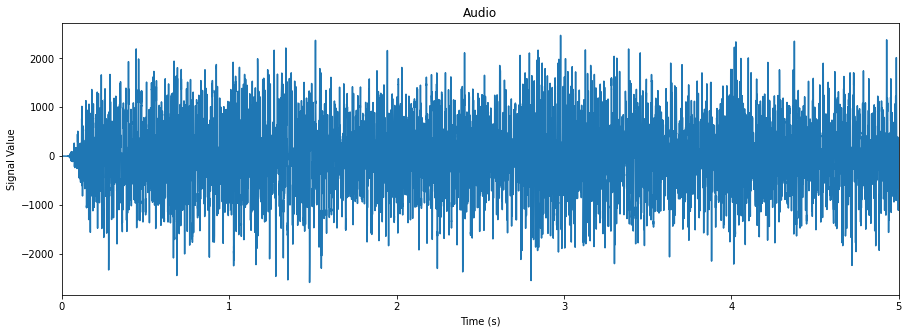

c:\Users\ppurn\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


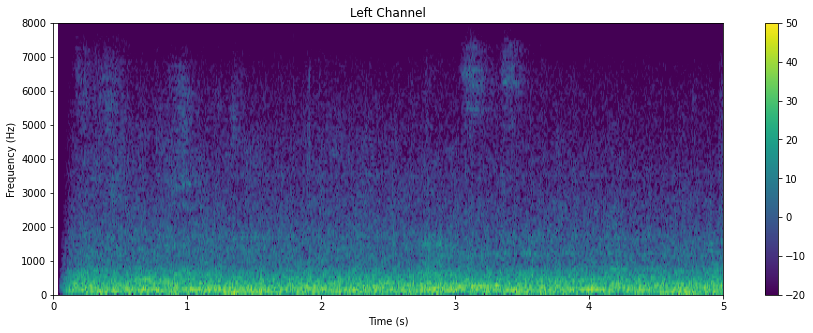

In [1]:
# https://learnpython.com/blog/plot-waveform-in-python/
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_obj = wave.open('output.wav', 'r')

sample_freq = wav_obj.getframerate()
print(sample_freq)

n_samples = wav_obj.getnframes()
print(n_samples)

t_audio = n_samples/sample_freq
print(t_audio, "seconds")

signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print(signal_array.shape)

# for stereo:
#l_channel = signal_array[0::2]
#r_channel = signal_array[1::2]

times = np.linspace(0, n_samples/sample_freq, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

## Microphone Recording

In [5]:
import pyaudio
import wave

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
p = pyaudio.PyAudio()
 
# starts recording
stream = p.open(
   format=FORMAT,
   channels=CHANNELS,
   rate=RATE,
   input=True,
   frames_per_buffer=FRAMES_PER_BUFFER
)

print("start recording...")

frames = []
seconds = 5
for i in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)

print("recording stopped")

stream.stop_stream()
stream.close()
p.terminate()


wf = wave.open("output.wav", 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

start recording...
recording stopped


### Loading MP3 files  

In [8]:
# brew install ffmpeg
# pip install pydub
from pydub import AudioSegment

audio = AudioSegment.from_wav("output.wav")
# audio = AudioSegment.from_mp3("mashup.mp3")

# boost volume by 6dB
audio = audio + 6

# repeat the clip twice
audio = audio * 2

# 2 sec fade in
audio = audio.fade_in(2000)

audio.export("mashup.mp3", format="mp3")

FileNotFoundError: [WinError 2] The system cannot find the file specified